# <パーティクルフィルタによる自己位置推定>

## 移動ロボットが動き回る平面を準備する
*  X軸、Y軸を設置した平面を、世界座標系</span>$\Sigma_\text{world}$と名づけた

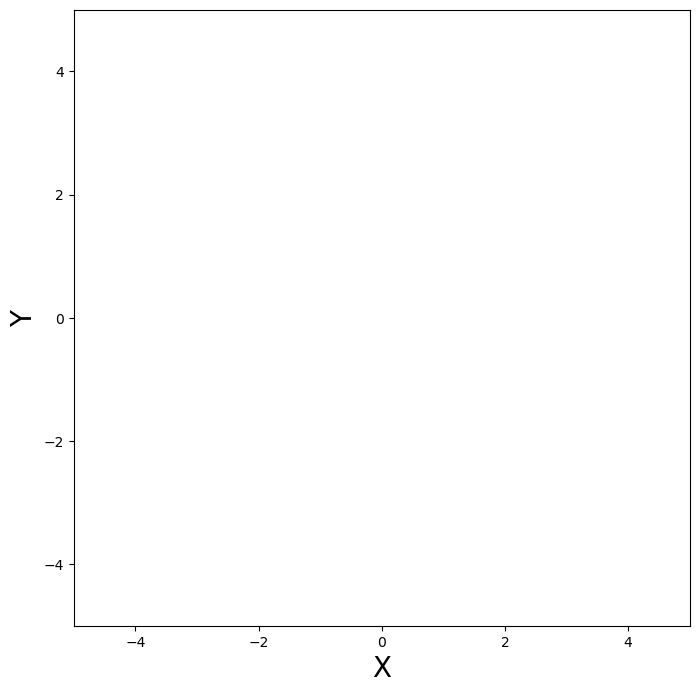

In [44]:
import matplotlib.pyplot as plt

class World:         
    def __init__(self):
        self.objects = []             
        
    def append(self,obj):             
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(8,8))                
        ax = fig.add_subplot(111)                      
        ax.set_aspect('equal')                         
        ax.set_xlim(-5,5)                              
        ax.set_ylim(-5,5)                              
        ax.set_xlabel("X",fontsize=20)                 
        ax.set_ylabel("Y",fontsize=20)                 
        
        for obj in self.objects: obj.draw(ax)          
            
        plt.show()
        
world = World()     
world.draw()

## 設置した座標系ロボット内にロボットを設置する
* 設置したロボットの状態（姿勢）を以下のように表現する
  * ベクトル$\V{x} = (x \ y \ \theta)^\top$


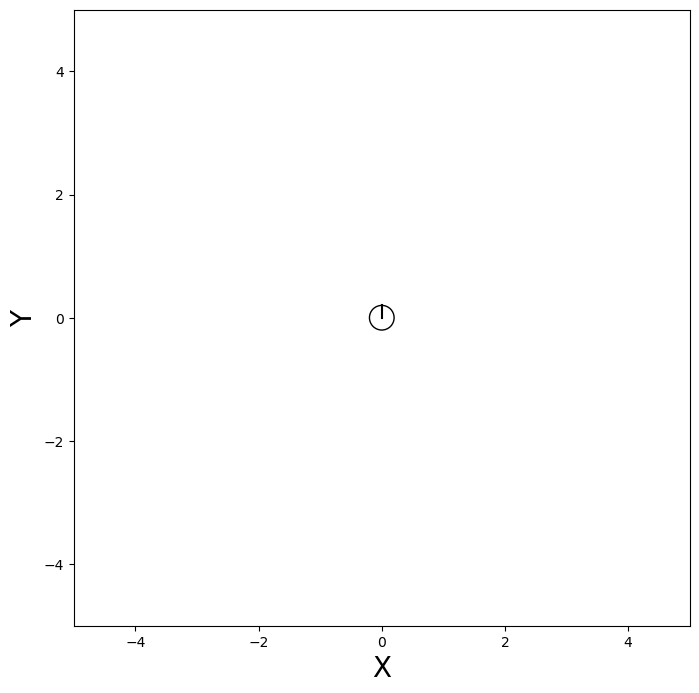

In [45]:
import math                         
import matplotlib.patches as patches
import numpy as np

class IdealRobot:                                        
    def __init__(self, pose, color="black"):
        self.pose = pose        
        self.r = 0.2           
        self.color = color      
        
    def draw(self, ax):
        x, y, theta = self.pose   
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)         
        ax.plot([x,xn], [y,yn], color=self.color) 
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        ax.add_patch(c)
        
robot1 = IdealRobot( np.array([0, 0, math.pi/2]).T )
world.append(robot1)        
world.draw()
     

## 状態と状態空間

* ロボットのとりうる状態$\V{x}$の集合（ロボットが行動できる範囲）を$\mathcal{X}$とする
    * $\mathcal{X}$を状態空間</span>と呼ぶ

* 数式で表現した場合
    * $\mathcal{X} = \\{ \V{x} = (x \ y \ \theta)^\top | x \in [x_\text{min},x_\text{max}] ,y \in [y_\text{min},y_\text{max}], \theta \in [-\pi, \pi) \\}$
    * $\V{x} \in \mathcal{X}$



設置した座標系にロボットを設置する

